Importing Libraries

In [5]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
import wave

Set the sound recording features

In [6]:
p = pyaudio.PyAudio()

chunk = 1024

stream = p.open(format=pyaudio.paInt16, channels=1, rate=16000, input=True, frames_per_buffer=chunk)

Recording the sound

In [7]:
frames = []
data2 = np.array([])

for i in range(0,50):
    a = stream.read(chunk, False)
    frames.append(a)
    data = np.fromstring(a, dtype=np.int16)
    data2 = np.append(data2, data)

stream.stop_stream()
stream.close()
p.terminate()

/var/folders/27/n62zk35s6nlfkhnp1kvqzm2c0000gn/T/ipykernel_9133/3148246679.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(a, dtype=np.int16)


Visualizing the recorded sound

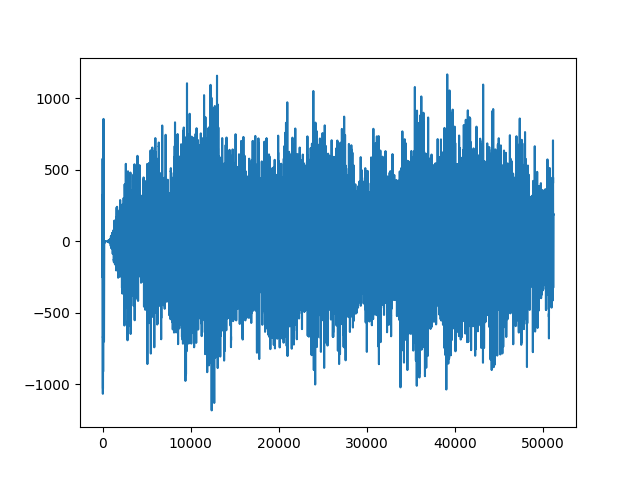

In [8]:
plt.close()
plt.plot(data2)
plt.show()

Calculating frequencies

In [9]:
tpCount = len(data2)

values = np.arange(int(tpCount/2))

timePeriod = tpCount/16000

frequencies = values/timePeriod

Using the Fourier series, we want to find out what hertz our sound is made of

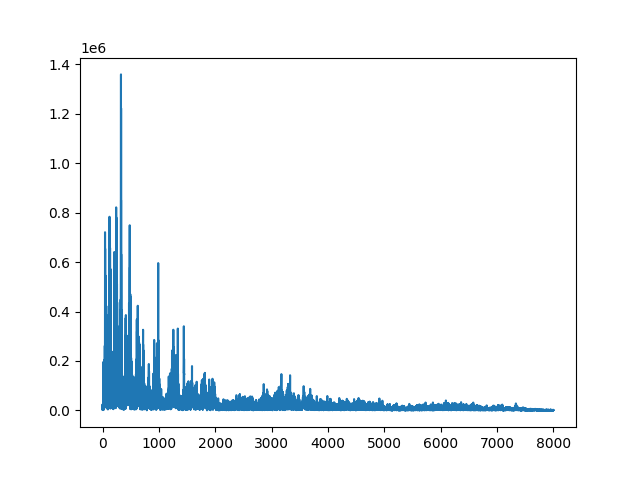

In [10]:
out_fft = np.fft.fft(data2)

# We want to halve this and only work with the right side, so we use the absolute value
out_fft = abs(out_fft[:25600])

plt.close()
plt.plot(frequencies, out_fft)
plt.show()

Using `specgram` to obtain the frequency spectrum of sound

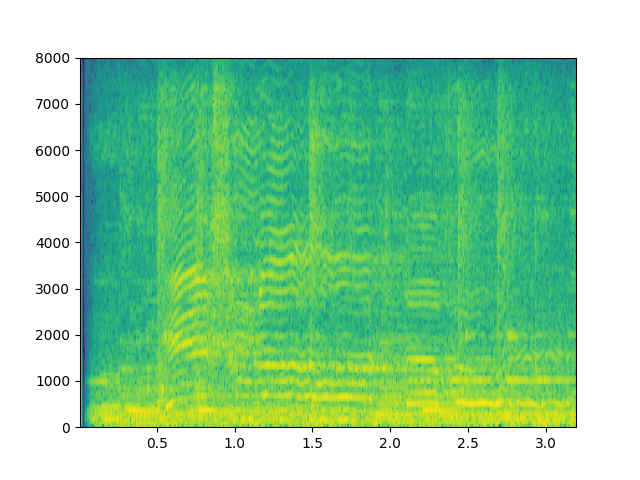

In [11]:
plt.close()
plt.specgram(data2, Fs=16000)
plt.show()

Convert number format to sound

In [12]:
p = pyaudio.PyAudio()

out = p.open(format=pyaudio.paInt16, channels=1, rate=16000, output=True, frames_per_buffer=chunk)

data_out = np.chararray.tostring(data2.astype(np.int16))

out.write(data_out)

/var/folders/27/n62zk35s6nlfkhnp1kvqzm2c0000gn/T/ipykernel_9133/2326378186.py:5: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  data_out = np.chararray.tostring(data2.astype(np.int16))


Outputting sound in wav format

In [13]:
sample_width = p.get_sample_size(pyaudio.paInt16)
wf = wave.open("Sound.wav", 'wb')
wf.setnchannels(1)
wf.setsampwidth(sample_width)
wf.setframerate(16000)
wf.writeframes(b''.join(frames))
wf .close()